# Importing Modules

In [107]:
pip install scikit-learn-extra

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples, completeness_score
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset and Examining

In [109]:
#Loading data
SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
dataset = pd.read_csv(SEEDS_DATA_URL, sep=r'\s+', header=None, names = ["col1", "col2", "col3", "col4", "col5", "col6", "col7", "target"])

In [110]:
dataset.head(10)

,col1,col2,col3,col4,col5,col6,col7,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [111]:
missing_values = dataset.isnull().sum()
print(missing_values)
#No missing Values

col1      0
col2      0
col3      0
col4      0
col5      0
col6      0
col7      0
target    0
dtype: int64


#K-Means Clustering and drawing Elbow plot

In [112]:
#Dropping target column
data = dataset.drop("target", axis=1)

In [113]:
#Determinining the optimal number of clusters using the elbow method
#Here I have initialized an array and added Within-Cluster Sum of Square for each K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

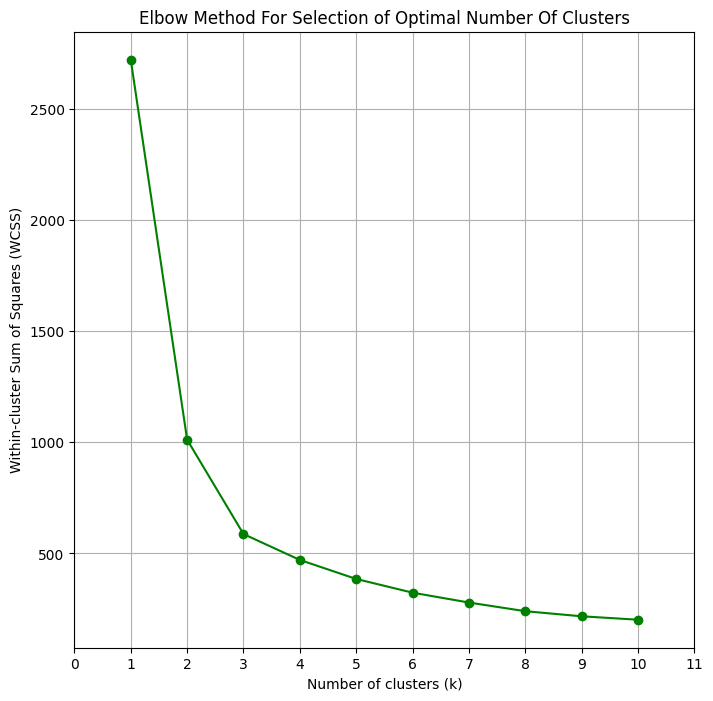

In [114]:
#Plotting WCSS against each K value to get optimal K using elbow method
plt.figure(figsize=(8, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='g')
plt.title('Elbow Method For Selection of Optimal Number Of Clusters')
plt.xticks(range(0,12))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [115]:
#K is chosen as 3 for this section
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
#Getting Cluster label predictions with K-means
cluster_labels_pred = kmeans.fit_predict(data)

In [116]:
# Computing the Silhouette score for K-means method
silhouette_avg = silhouette_score(data, cluster_labels_pred)
silhouette_per_sample = silhouette_samples(data, cluster_labels_pred)

In [117]:
# Computing the purity score for K-means method
#Getting ground truth labels from traget column to compute purity
gt_labels = dataset['target']
purity = completeness_score(gt_labels, cluster_labels_pred)

In [118]:
print("--------------------Result with K-means------------------------")
print(f"Silhouette Score is: {silhouette_avg}")
print(f"Purity is: {purity}")

--------------------Result with K-means------------------------
Silhouette Score is: 0.4719337319126887
Purity is: 0.6963955472960219


# Clustering Using K-Mediods Method

In [119]:
# Performing k-medoids as K=3
k = 3
kmedoids = KMedoids(n_clusters=k, random_state=42)
#Getting Cluster label predictions with K-mediods
cluster_labels_pred = kmedoids.fit_predict(data)

In [120]:
# Computing the Silhouette Score for K-mediods method
silhouette_avg = silhouette_score(data, cluster_labels_pred)
silhouette_per_sample = silhouette_samples(data, cluster_labels_pred)

In [121]:
# Compute the purity for K-mediods method
#Getting ground truth labels from traget column to compute purity
gt_labels = dataset['target']
purity = completeness_score(gt_labels, cluster_labels_pred)

In [122]:
print("--------------------Result with K-mediods------------------------")
print(f"Silhouette Score is : {silhouette_avg}")
print(f"Purity is : {purity}")

--------------------Result with K-mediods------------------------
Silhouette Score is : 0.4681390800859686
Purity is : 0.7126129020336406
